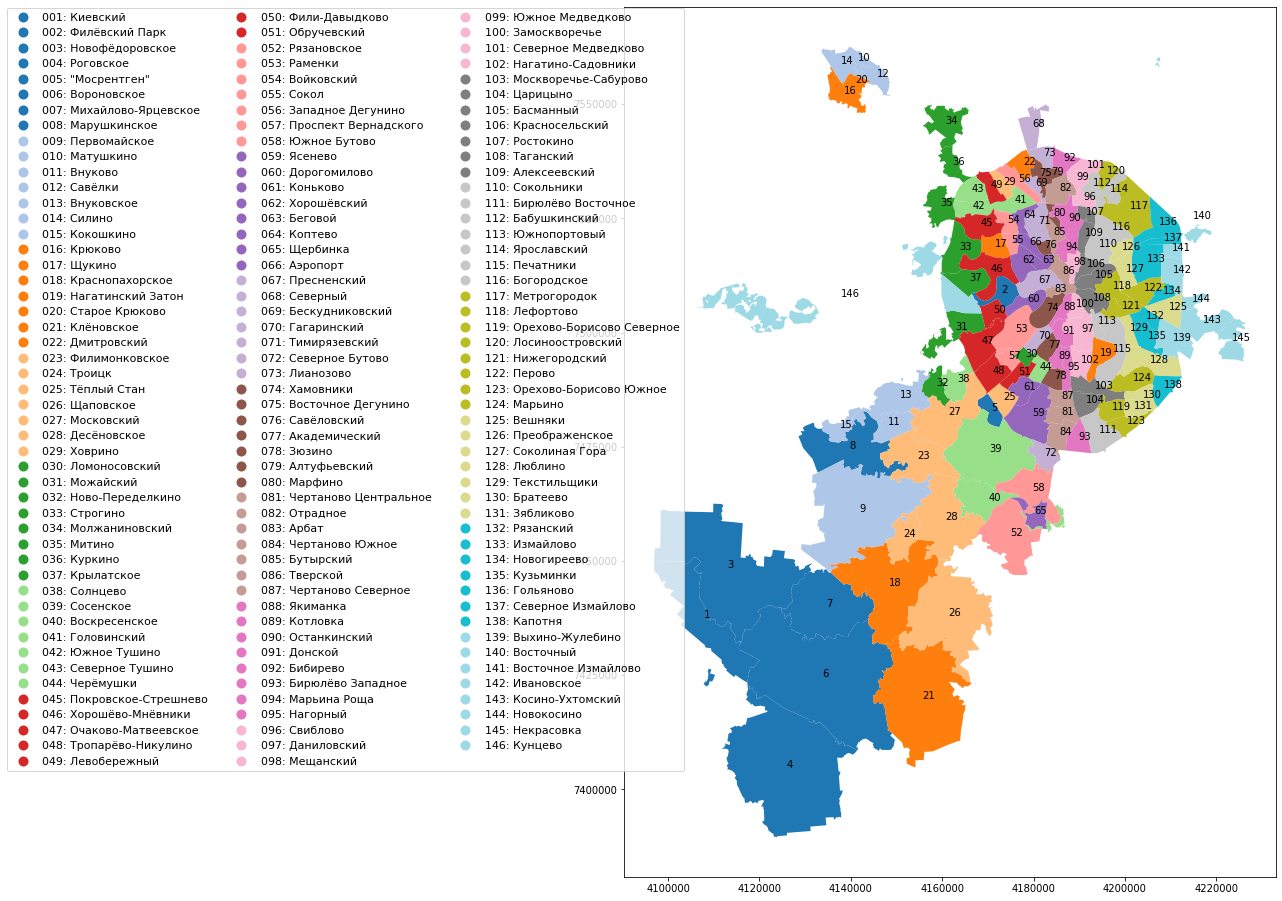

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd
import descartes

def fill_zero (a):
    if len(a) < 3:
        return fill_zero("0" + a)
    else:
        return a

data = gpd.read_file("https://video.ittensive.com/python-advanced/moscow.json")
data = data.to_crs({'init' : 'epsg:3857'})
data["ID"] = range(1, len(data)+1)
data["Title"] = data["ID"].astype(str).apply(fill_zero) + ": " + data["NAME"].astype(str)
fig = plt.figure(figsize=(20,16))
area = plt.subplot(1, 1, 1)
data.plot(ax = area, legend=True, column="Title",
             linewidth=0.5, cmap="tab20",
             legend_kwds = {"ncol": 3,
                           "bbox_to_anchor": (0, 1.005, 0.1, 0),
                           "fontsize": 11})
for _,adm in data.iterrows():
    area.annotate(adm.ID,
                  xy=(adm.geometry.centroid.x, adm.geometry.centroid.y))
plt.show()